In [9]:

# Cài đặt thư viện statsmodels nếu chưa có
!pip install statsmodels



In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from itertools import product
import pandas as pd
from google.colab import drive

# Kết nối Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

class StockModelEvaluation:
    def __init__(self):
        self.results_additive = []
        self.results_multiplicative = []

    def optimize_holt_winters(self, train_df, seasonal='add', seasonal_periods=12):
        best_mae = float('inf')
        best_params = None

        alphas = betas = gammas = np.arange(0.1, 1.0, 0.1)
        params = product(alphas, betas, gammas)

        for alpha, beta, gamma in params:
            try:
                model = ExponentialSmoothing(
                    train_df['y'],
                    trend='add',
                    seasonal=seasonal,
                    seasonal_periods=seasonal_periods
                ).fit(
                    smoothing_level=alpha,
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma
                )

                forecast = model.fittedvalues
                mae = mean_absolute_error(train_df['y'], forecast)

                if mae < best_mae:
                    best_mae = mae
                    best_params = (alpha, beta, gamma)

            except Exception as e:
                continue

        return best_params

    def fit_and_predict_holt_winters_additive(self, train_df, test_df, ticker, seasonal_periods=12):
        best_alpha, best_beta, best_gamma = self.optimize_holt_winters(train_df, seasonal='add', seasonal_periods=seasonal_periods)

        model = ExponentialSmoothing(
            train_df['y'],
            trend='add',
            seasonal='add',
            seasonal_periods=seasonal_periods
        ).fit(
            smoothing_level=best_alpha,
            smoothing_trend=best_beta,
            smoothing_seasonal=best_gamma
        )

        forecast = model.forecast(len(test_df)).rename('Holt_Winters_Forecast')

        y_true = test_df['y'].values
        y_pred = forecast.values

        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))

        print(f'Ticker: {ticker}, MAE: {mae}, RMSE: {rmse}, Seasonal: add')

        result = {
            'ticker': ticker,
            'mae': mae,
            'rmse': rmse,
            'seasonality_mode': 'add'
        }
        self.results_additive.append(result)

        return forecast, mae, rmse

    def fit_and_predict_holt_winters_multiplicative(self, train_df, test_df, ticker, seasonal_periods=12):
        best_alpha, best_beta, best_gamma = self.optimize_holt_winters(train_df, seasonal='mul', seasonal_periods=seasonal_periods)

        model = ExponentialSmoothing(
            train_df['y'],
            trend='add',
            seasonal='mul',
            seasonal_periods=seasonal_periods
        ).fit(
            smoothing_level=best_alpha,
            smoothing_trend=best_beta,
            smoothing_seasonal=best_gamma
        )

        forecast = model.forecast(len(test_df)).rename('Holt_Winters_Forecast')

        y_true = test_df['y'].values
        y_pred = forecast.values

        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))

        print(f'Ticker: {ticker}, MAE: {mae}, RMSE: {rmse}, Seasonal: mul')

        result = {
            'ticker': ticker,
            'mae': mae,
            'rmse': rmse,
            'seasonality_mode': 'mul'
        }
        self.results_multiplicative.append(result)

        return forecast, mae, rmse

    def plot_forecast_holt_winters(self, train_df, forecast, test_df, ticker, seasonality_mode):
        plt.figure(figsize=(10, 6))
        plt.plot(train_df['ds'], train_df['y'], label='Train', color='blue')
        plt.plot(test_df['ds'], test_df['y'], label='Test', color='green')
        plt.plot(test_df['ds'], forecast, label='Prediction', color='orange')
        plt.title(f'Ticker: {ticker} - Holt-Winters Seasonality: {seasonality_mode}')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

    def get_results(self):
        results_additive_df = pd.DataFrame(self.results_additive)
        results_multiplicative_df = pd.DataFrame(self.results_multiplicative)
        return results_additive_df, results_multiplicative_df




In [12]:
# Đường dẫn tới file trên Google Drive
train_file_path = '//content/drive/MyDrive/LuanVan/data/ComVN30_train.csv'
test_file_path = '/content/drive/MyDrive/LuanVan/data/ComVN30_test.csv'

# Đọc dữ liệu
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Chuyển đổi cột 'time' sang định dạng datetime
train_df['time'] = pd.to_datetime(train_df['time'])
test_df['time'] = pd.to_datetime(test_df['time'])

Processing ticker (Additive): SSI


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

Ticker: SSI, MAE: 1573.2246122636873, RMSE: 1901.5614662573141, Seasonal: add


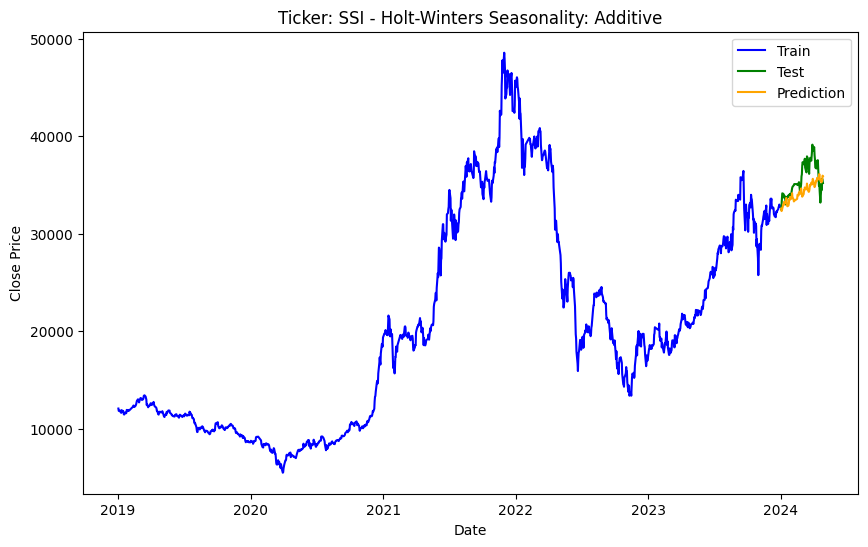

Processing ticker (Additive): BCM


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: BCM, MAE: 2934.994006258014, RMSE: 4445.685507003887, Seasonal: add


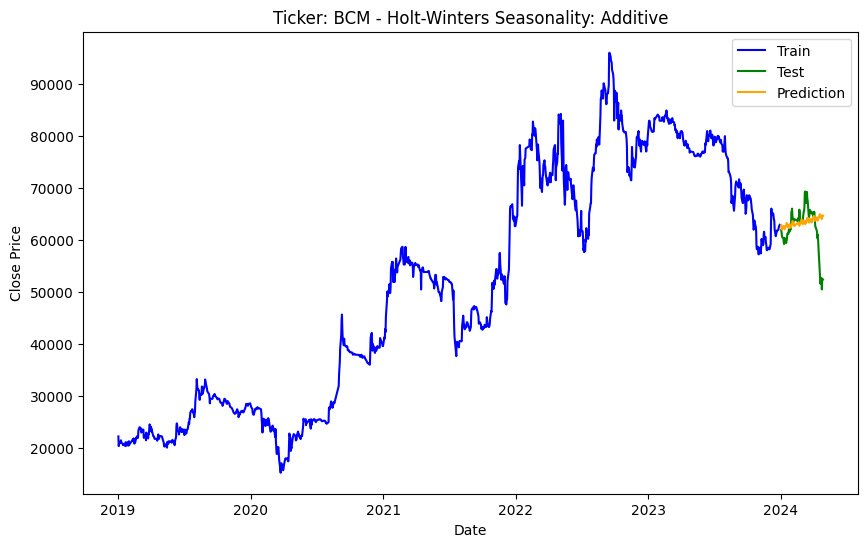

Processing ticker (Additive): VHM


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: VHM, MAE: 6482.263064591893, RMSE: 7597.002772804523, Seasonal: add


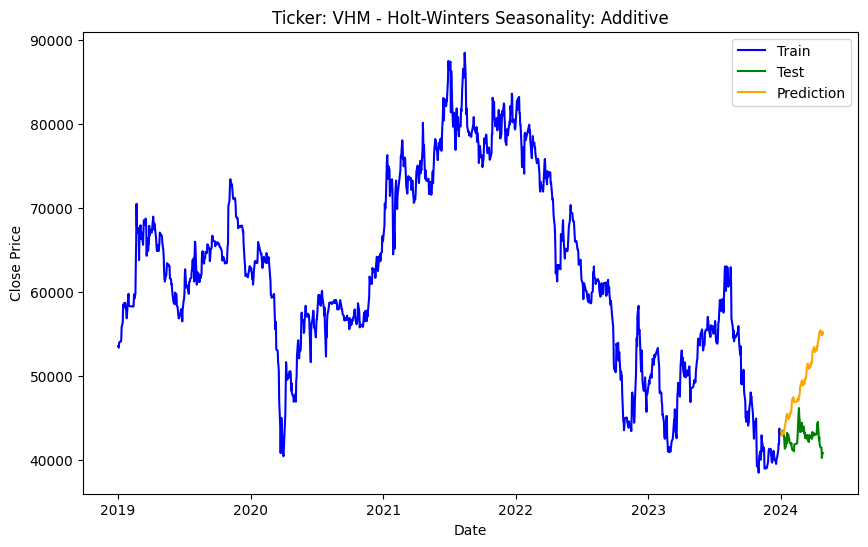

Processing ticker (Additive): VIC


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: VIC, MAE: 1593.9520488158903, RMSE: 1963.2967747077557, Seasonal: add


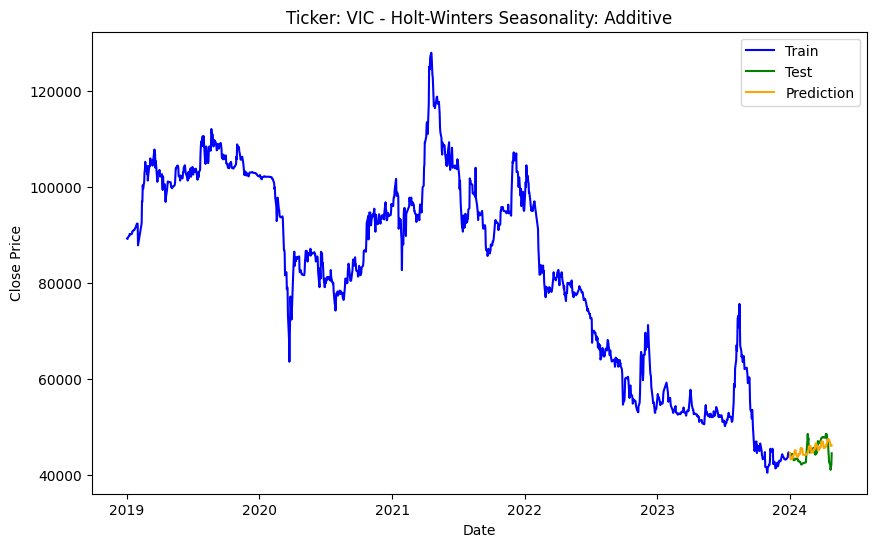

Processing ticker (Additive): VRE


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: VRE, MAE: 1433.206686721055, RMSE: 1759.5095028080873, Seasonal: add


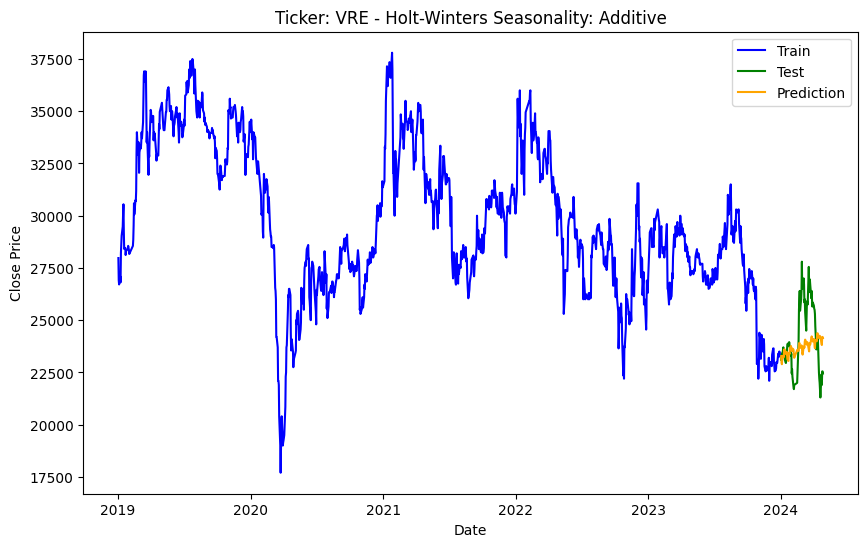

Processing ticker (Additive): BVH


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: BVH, MAE: 1668.5636963919435, RMSE: 1924.0756644381408, Seasonal: add


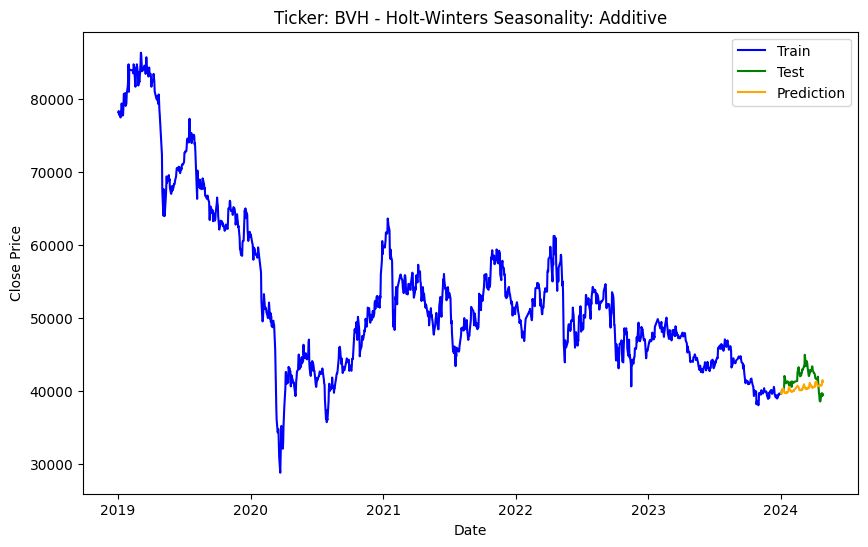

Processing ticker (Additive): POW


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: POW, MAE: 918.5084738912277, RMSE: 990.6197292522969, Seasonal: add


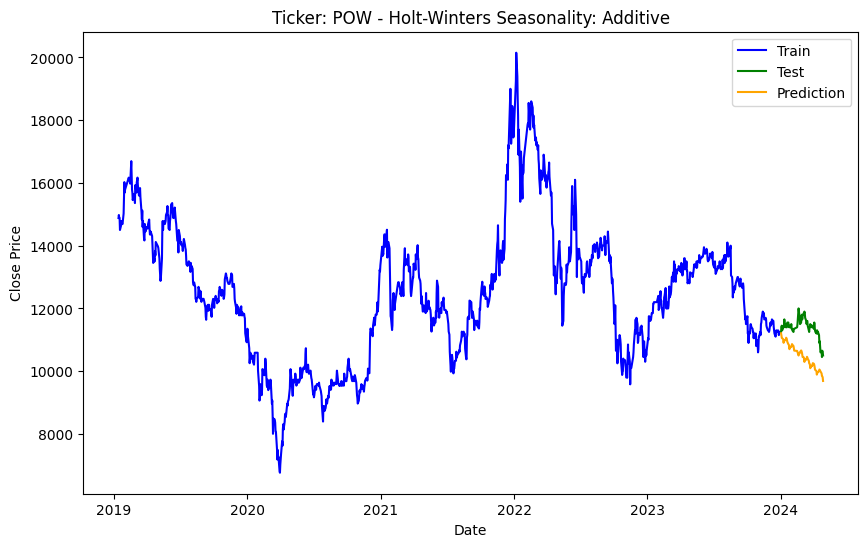

Processing ticker (Additive): GAS


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python

Ticker: GAS, MAE: 3420.8211299971504, RMSE: 4375.502933475087, Seasonal: add


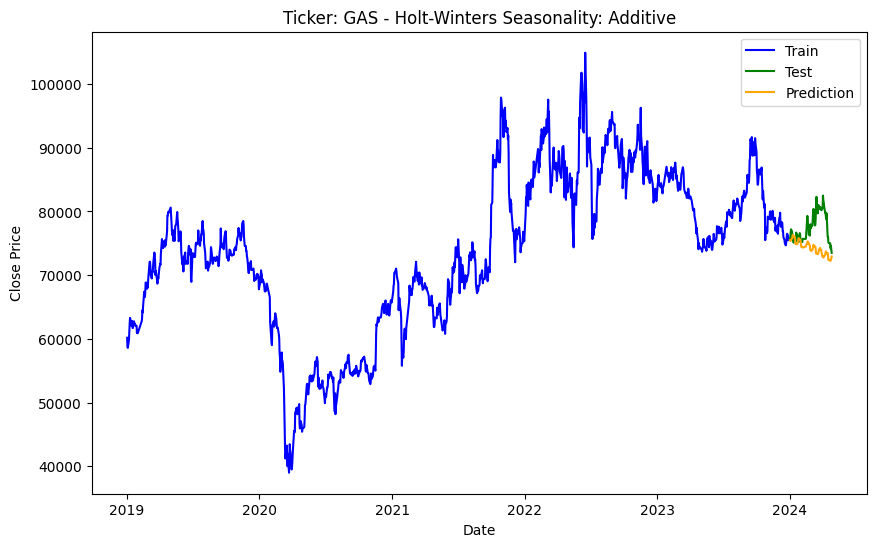

Processing ticker (Additive): ACB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: ACB, MAE: 1431.9790073546635, RMSE: 1974.0356986624063, Seasonal: add


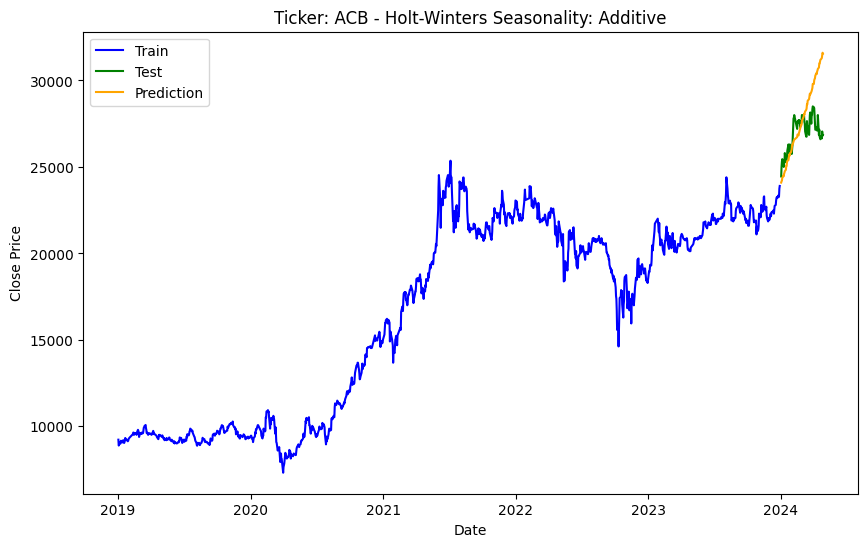

Processing ticker (Additive): BID


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: BID, MAE: 2347.546019593865, RMSE: 3209.56694813453, Seasonal: add


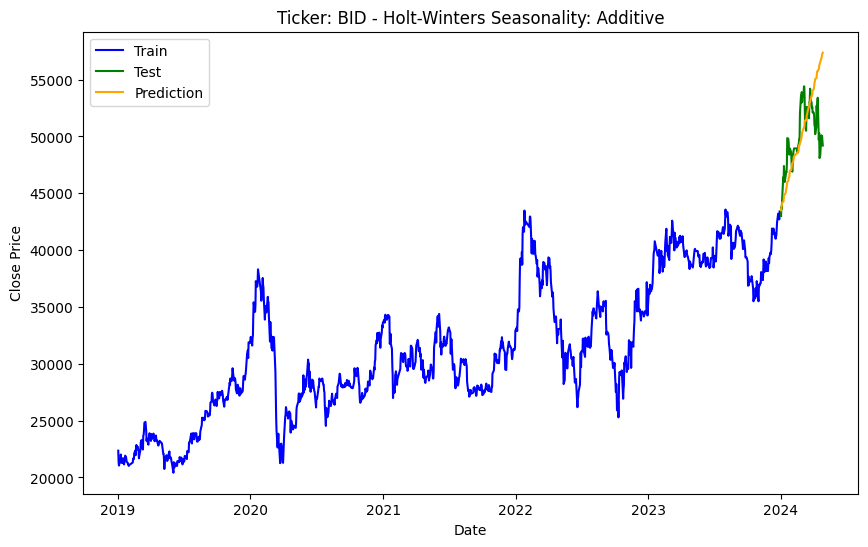

Processing ticker (Additive): CTG


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: CTG, MAE: 4209.412366408395, RMSE: 4577.143650969243, Seasonal: add


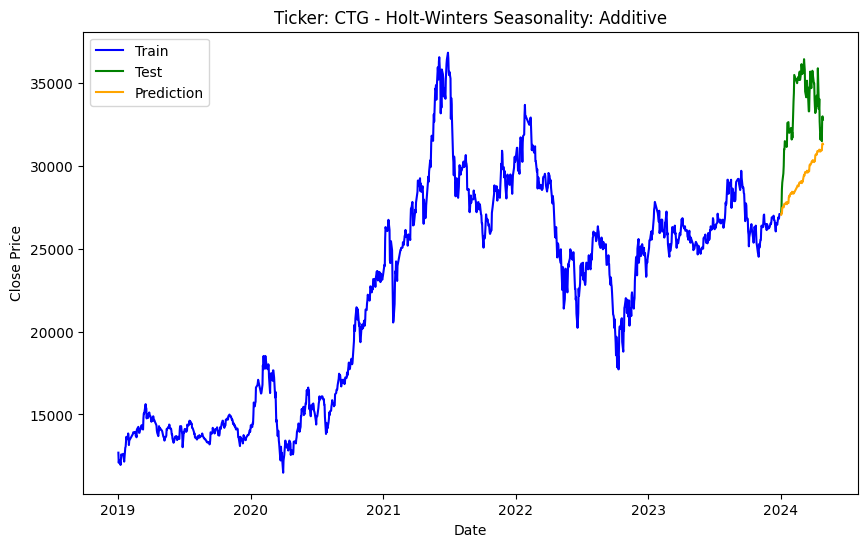

Processing ticker (Additive): HDB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: HDB, MAE: 3356.537552299108, RMSE: 4140.184514560033, Seasonal: add


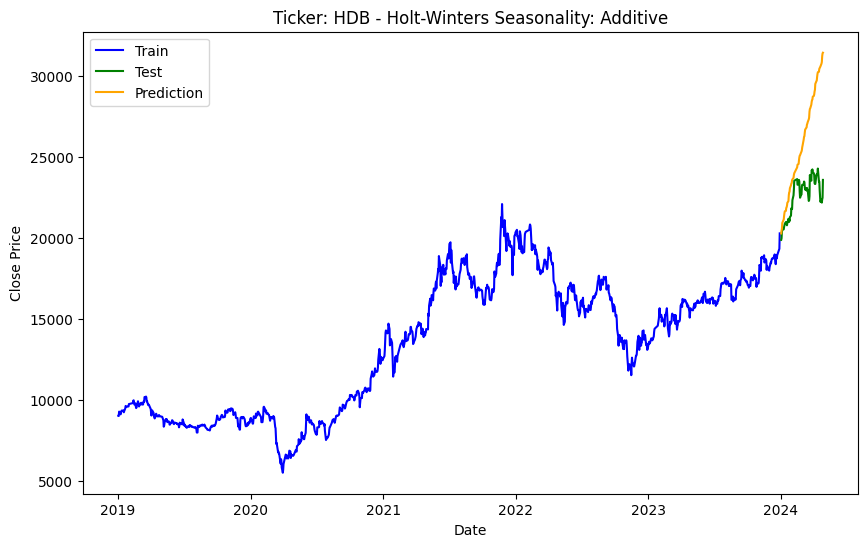

Processing ticker (Additive): MBB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: MBB, MAE: 2414.911621546155, RMSE: 2636.2629397064456, Seasonal: add


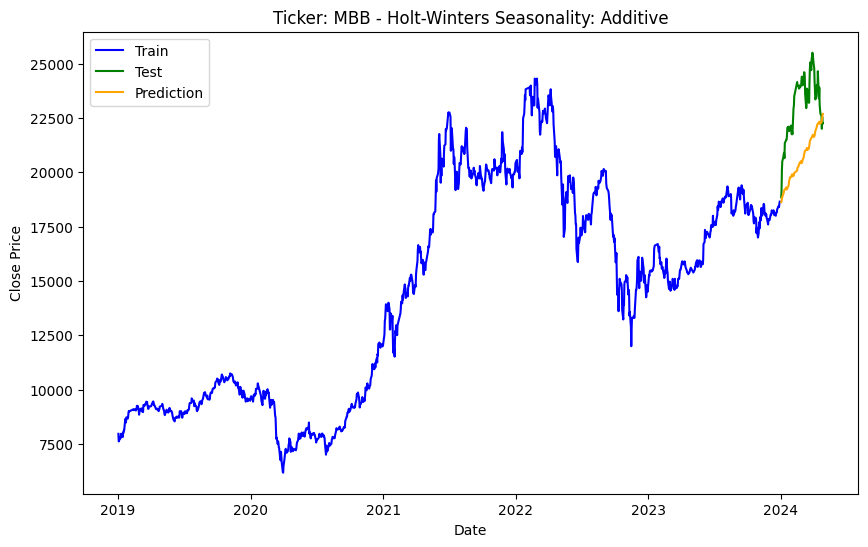

Processing ticker (Additive): SSB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: SSB, MAE: 5422.063359453507, RMSE: 6148.227111616835, Seasonal: add


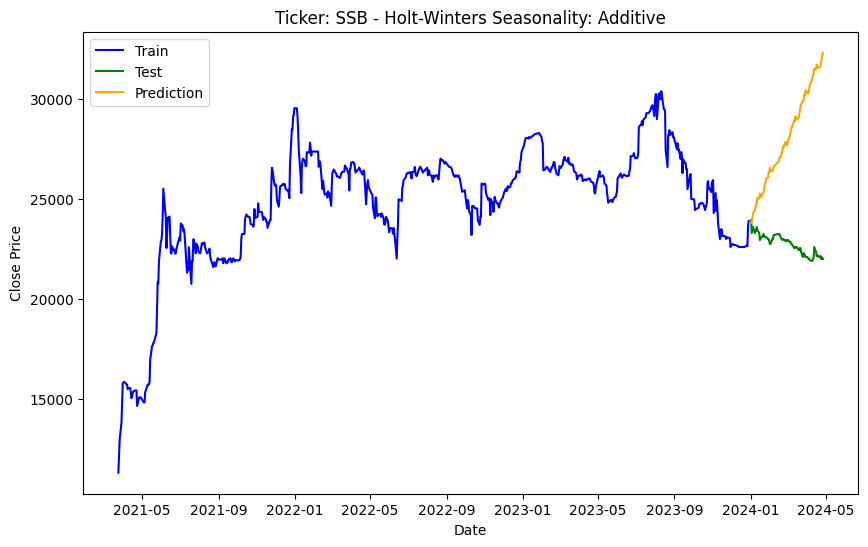

Processing ticker (Additive): SHB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Ticker: SHB, MAE: 531.9668684565395, RMSE: 644.440753154988, Seasonal: add


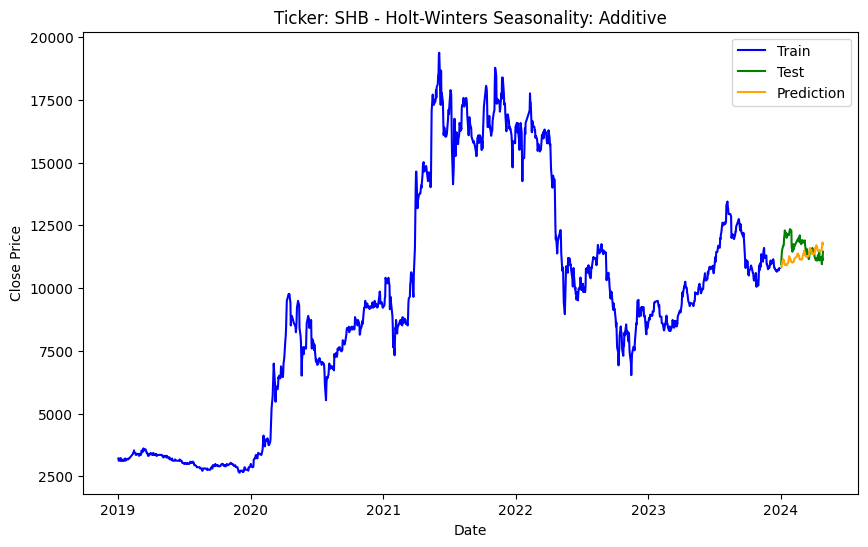

Processing ticker (Additive): STB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

KeyboardInterrupt: 

In [13]:
# Tạo đối tượng StockModelEvaluation
evaluator_holt_winters = StockModelEvaluation()

# Lấy danh sách các mã chứng khoán
tickers = train_df['ticker'].unique()

# Vòng lặp qua từng mã chứng khoán với mô hình Holt-Winters additive
for ticker in tickers:
    print(f"Processing ticker (Additive): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Holt-Winters
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Huấn luyện và dự báo với mô hình Holt-Winters additive
    forecast_additive, mae_additive, rmse_additive = evaluator_holt_winters.fit_and_predict_holt_winters_additive(
        train_df_ticker, test_df_ticker, ticker
    )
    # Vẽ biểu đồ dự báo
    evaluator_holt_winters.plot_forecast_holt_winters(train_df_ticker, forecast_additive, test_df_ticker, ticker, 'Additive')


In [ ]:

# Vòng lặp qua từng mã chứng khoán với mô hình Holt-Winters multiplicative
for ticker in tickers:
    print(f"Processing ticker (Multiplicative): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Holt-Winters
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Huấn luyện và dự báo với mô hình Holt-Winters multiplicative
    forecast_multiplicative, mae_multiplicative, rmse_multiplicative = evaluator_holt_winters.fit_and_predict_holt_winters_multiplicative(
        train_df_ticker, test_df_ticker, ticker
    )
    # Vẽ biểu đồ dự báo
    evaluator_holt_winters.plot_forecast_holt_winters(train_df_ticker, forecast_multiplicative, test_df_ticker, ticker, 'Multiplicative')




In [ ]:
# Lấy và hiển thị kết quả
results_df_additive, results_df_multiplicative = evaluator_holt_winters.get_results()

# Hiển thị kết quả
print("Additive Seasonality Results:")
print(results_df_additive)
print("Multiplicative Seasonality Results:")
print(results_df_multiplicative)